In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
combined_data_o=pd.read_excel("./part1.xlsx",sheet_name=0,parse_dates=True)
commodity_price_o=pd.read_excel("./part1.xlsx","Commodity Prices",parse_dates=True)
net_demand_o= pd.read_excel("./part1.xlsx","Net Demand Data")
keygen_avail_o= pd.read_excel("./part1.xlsx","Key Generator Availability")
keygen_cost_o= pd.read_excel("./part1.xlsx","Key Generator Costs")

In [3]:
# Creating a copy of data
combined_data = combined_data_o
commodity_price = commodity_price_o
net_demand = net_demand_o
keygen_avail = keygen_avail_o
keygen_cost = keygen_cost_o

In [4]:
## Data preprocessing for DAM hourly and monthly

combined_data = combined_data.iloc[2:,]
dam_hourly = combined_data.iloc[:,0:6]
dam_monthly= combined_data.iloc[:,8:10]
dam_hourly = dam_hourly.rename(columns={"Unnamed: 0": "start_time", 
                           "Unnamed: 1": "month", 
                           "Unnamed: 2": "year",
                           "Unnamed: 3": "trade_date",
                           "Unnamed: 4": "start_date",
                           "Unnamed: 5": "DAM_price"}).reset_index(drop=True)


dam_monthly = dam_monthly.rename(columns={"Unnamed: 8": "trade_month", 
                            "Unnamed: 9": "DAM_price"}).reset_index(drop=True)



## Data preprocessing for commodity_price
commodity_price = commodity_price.iloc[2:,]
commodity_price = commodity_price.rename(columns={"Unnamed: 0": "date", 
                           "Unnamed: 1": "gas",
                           "Unnamed: 2": "carbon",
                           "Unnamed: 3": "coal",
                           "Unnamed: 4": "oil",
                           "Unnamed: 5": "Distillate",
                           "Unnamed: 6": "Exchange_rate"}).reset_index(drop=True)

## Data preprocessing for net_demand
net_demand = net_demand.iloc[2:,]
net_demand = net_demand.rename(columns={"Unnamed: 0": "date", 
                           "Unnamed: 1": "day_wind",
                           "Unnamed: 2": "cont_wind",
                           "Unnamed: 3": "actual_wind",
                           "Unnamed: 4": "day_demand",
                           "Unnamed: 5": "cont_demand",
                           "Unnamed: 6": "actual_demand",
                           "Unnamed: 7": "day_netdemand",
                           "Unnamed: 8": "cont_netdemand",
                           "Unnamed: 9": "actual_netdemand"}).reset_index(drop=True)


## Data preprocessing for keygen_avail
fuel_info = keygen_avail.iloc[1:3,2:].T.reset_index(drop=True).rename(columns={1: "fuel",2:"Generator"})
fuel_info.head()
keygen_avail.columns = keygen_avail.iloc[2]
keygen_avail=keygen_avail.iloc[3:].reset_index(drop=True)
keygen_avail = keygen_avail.rename(columns={"2": " ", 
                           "Start Date": "date",
                           "Start Time 30 Minute Period": "time"})


## Data preprocessing for keygen_cost
keygen_cost.columns = keygen_cost.iloc[2]
keygen_cost = keygen_cost[3:].reset_index(drop=True)
keygen_cost = keygen_cost.rename(columns={"Daily Av €/MWh cost": "Daily_avg_cost"})



dam_monthly = dam_monthly.infer_objects()
dam_hourly = dam_hourly.infer_objects() 
commodity_price = commodity_price.infer_objects()
net_demand = net_demand.infer_objects()
fuel_info = fuel_info.infer_objects()
keygen_avail = keygen_avail.infer_objects()
keygen_cost = keygen_cost.infer_objects()

dam_monthly['trade_month'] = pd.to_datetime(dam_monthly['trade_month'])
commodity_price['date'] = pd.to_datetime(commodity_price['date'])

In [5]:
## Veryfying the data

data_list =[dam_monthly,dam_hourly,commodity_price,net_demand,fuel_info,keygen_avail,keygen_cost]
data_names =["Monthy DAM","Hourly DAM","Commodity Prices","Net Demand","Generator Fuel","Key generator Availaibility","Key generator Cost"]
#for i,data in enumerate(data_list):
#    print(f"-------{data_names[i]}-------")
#    print(data.head(3))    

2021-06-30 00:00:00
82.8625
2021-05-14 00:00:00
56.49
2021-06-30 00:00:00
120.75
2018-10-03 00:00:00
483.224
2018-10-04 00:00:00
744.75
2020-02-19 00:00:00
1.205


Text(0.5, 0.98, 'Commodity prices across years')

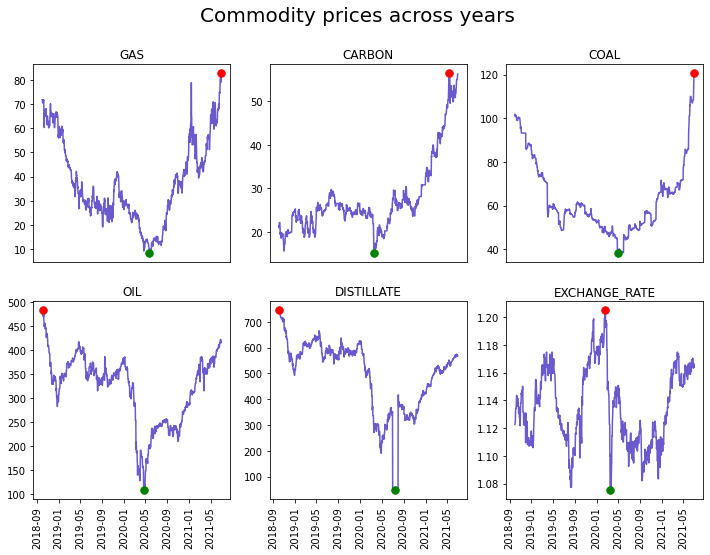

In [6]:
# Plot for Commodity prices accross years

plt.figure(figsize=(12,8))
plot=231
for i in range(1,7):
    plt.subplot(plot)
    min_date = commodity_price.iloc[np.argmin(commodity_price.iloc[:,i]),0]
    max_date = commodity_price.iloc[np.argmax(commodity_price.iloc[:,i]),0]
    print(max_date)
    print(max(commodity_price.iloc[:,i]))
    plt.plot(commodity_price.iloc[:,0],commodity_price.iloc[:,i], color="slateblue")
    plt.plot(min_date,min(commodity_price.iloc[:,i]),"g.",markersize=15)
    plt.plot(max_date,max(commodity_price.iloc[:,i]),"r.",markersize=15)
    if (plot <234):
        plt.xticks([])
    plt.xticks(rotation=90)
    plt.title(str.upper(commodity_price.columns[i]))
    plot=plot+1
plt.suptitle("Commodity prices across years", fontsize=20)

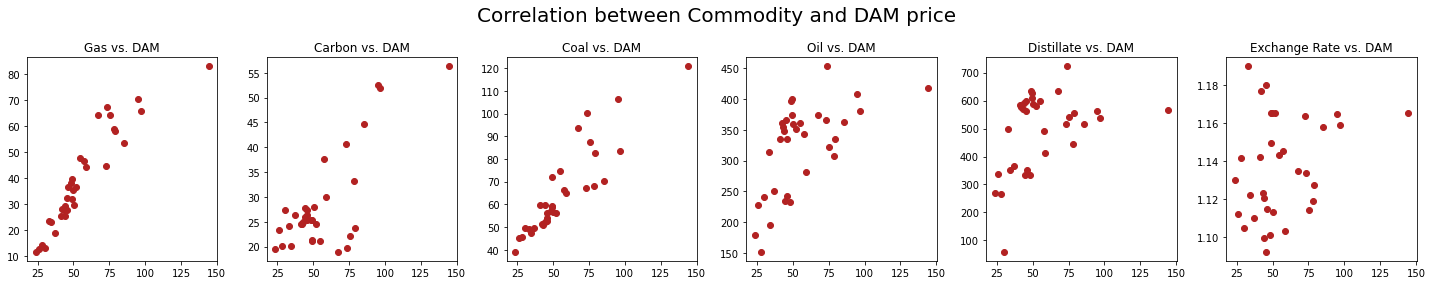

In [7]:
# Veirfy the correlation between the variables
corr1 =commodity_price.resample('1M', on='date',label="left", closed="left").mean().reset_index(drop=True)
corr2 =dam_monthly[dam_monthly["trade_month"] <= "2021-07-01"]['DAM_price'].reset_index(drop=True)
final_cor = pd.concat([corr1, corr2], axis=1, ignore_index=True)
final_cor.columns=["Gas","Carbon","Coal","Oil","Distillate","Exchange Rate","DAM_price"]

plt.figure(figsize=(20,4))
plot=161
for i in range(0,6):
    plt.subplot(plot)
    plt.scatter(final_cor.iloc[:,6],final_cor.iloc[:,i],color="firebrick")
    plt.title(f"{final_cor.columns[i]} vs. DAM")
    plot=plot+1
plt.suptitle("Correlation between Commodity and DAM price", fontsize=20)
plt.tight_layout()

In [8]:
# Create a corelation plot to understand its strength

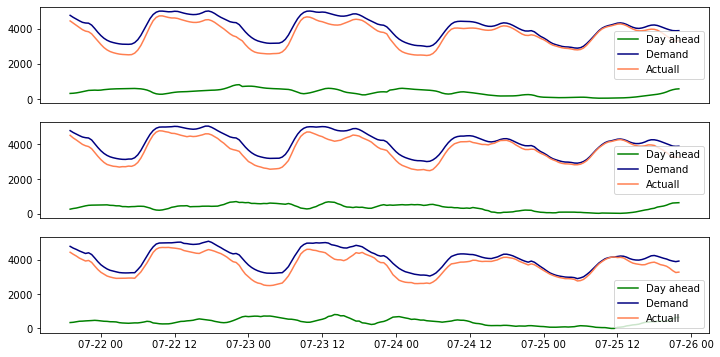

In [9]:
plt.figure(figsize=(12,6))
plot=311
new = net_demand.iloc[-200:-1]
for i in range (1,4):
    plt.subplot(plot)
    if (plot < 313):
        plt.xticks([])
    plt.plot(new.iloc[:,0],new.iloc[:,i+0],color="g",label="Day ahead")
    plt.plot(new.iloc[:,0],new.iloc[:,i+3],color="navy",label="Demand")
    plt.plot(new.iloc[:,0],new.iloc[:,i+6],color="coral",label="Actuall")
    plt.legend()
    plot=plot+1

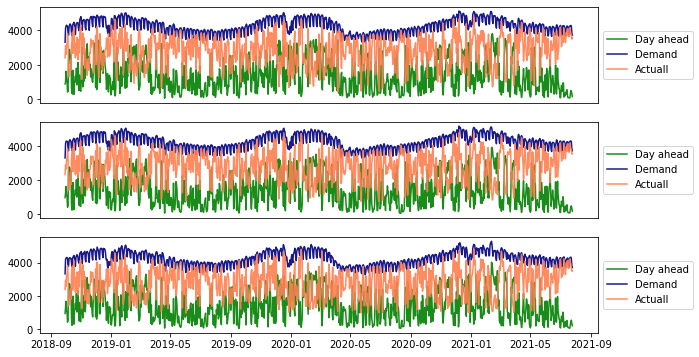

In [10]:
plt.figure(figsize=(10,6))
plot=311
new= net_demand.resample('1d', on='date',label="left", closed="left").mean()
for i in range (0,3):
    plt.subplot(plot)
    if (plot < 313):
        plt.xticks([])
    plt.plot(new.index,new.iloc[:,i+0],color="g",alpha=0.9,label="Day ahead")
    plt.plot(new.index,new.iloc[:,i+3],color="navy",alpha=0.9,label="Demand")
    plt.plot(new.index,new.iloc[:,i+6],color="coral",alpha=0.9,label="Actuall")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plot=plot+1

In [11]:
fuel_info

,fuel,Generator
0,Coal,GU_400270
1,Coal,GU_400271
2,Coal,GU_400272
3,Gas,GU_400324
4,Gas,GU_400325
5,Gas,GU_400480
6,Gas,GU_400500
7,Gas,GU_400530
8,Gas,GU_400540
9,Gas,GU_400762


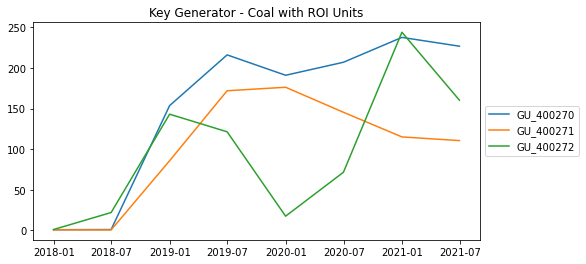

In [12]:
keygen_avail['date'] = pd.to_datetime(keygen_avail['date'])
coal_gem = fuel_info[fuel_info["fuel"] =="Coal"][['Generator']]
gas_gem = fuel_info[fuel_info["fuel"] =="Gas"][['Generator']]
keygen_avail_month= keygen_avail.resample('6m',on='date',label="left", closed="left").mean()

coal_data_roi = keygen_avail_month[coal_gem["Generator"].reset_index(drop=True)[0:3]]
coal_data_ni = keygen_avail_month[coal_gem["Generator"].reset_index(drop=True)[3:5]]
gas_data_roi = keygen_avail_month[gas_gem["Generator"].reset_index(drop=True)[0:9]]
gas_data_ni = keygen_avail_month[gas_gem["Generator"].reset_index(drop=True)[9:16]]


data_c_roi = coal_data_roi[-25:].fillna(0)
plt.figure(figsize=(8,4))
for i in range(0,len(coal_data_roi.columns)):
    plt.plot(data_c_roi.index,data_c_roi.iloc[:,i], label=data_c_roi.columns[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Key Generator - Coal with ROI Units")


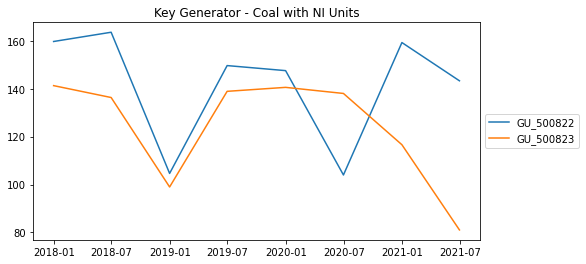

In [13]:
plt.figure(figsize=(8,4))
data_c_ni = coal_data_ni[-25:].fillna(0)
for i in range(0,len(coal_data_ni.columns)):
    plt.plot(data_c_ni.index,data_c_ni.iloc[:,i], label=data_c_ni.columns[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Key Generator - Coal with NI Units")

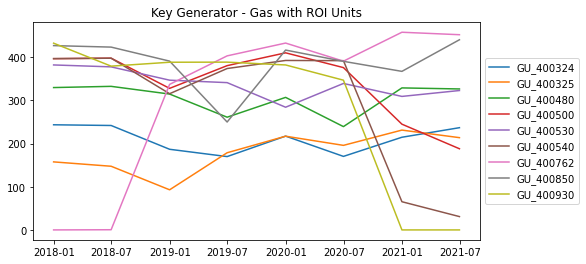

In [14]:
plt.figure(figsize=(8,4))
data_g_roi = gas_data_roi[-25:].fillna(0)
for i in range(0,len(data_g_roi.columns)):
    plt.plot(data_g_roi.index,data_g_roi.iloc[:,i], label=data_g_roi.columns[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Key Generator - Gas with ROI Units")

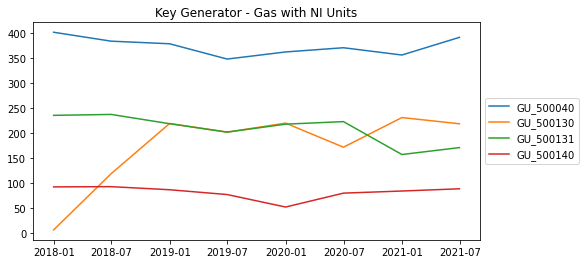

In [15]:
plt.figure(figsize=(8,4))
data_g_ni = gas_data_ni[-25:].fillna(0)
for i in range(0,len(gas_data_ni.columns)):
    plt.plot(data_g_ni.index,data_g_ni.iloc[:,i], label=data_g_ni.columns[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Key Generator - Gas with NI Units")

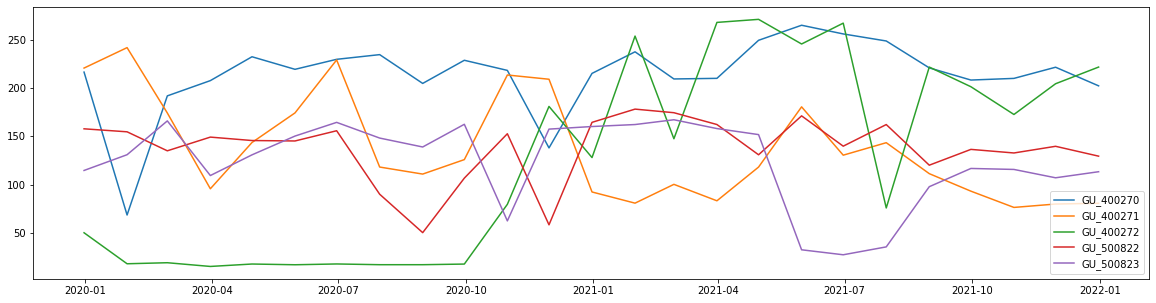

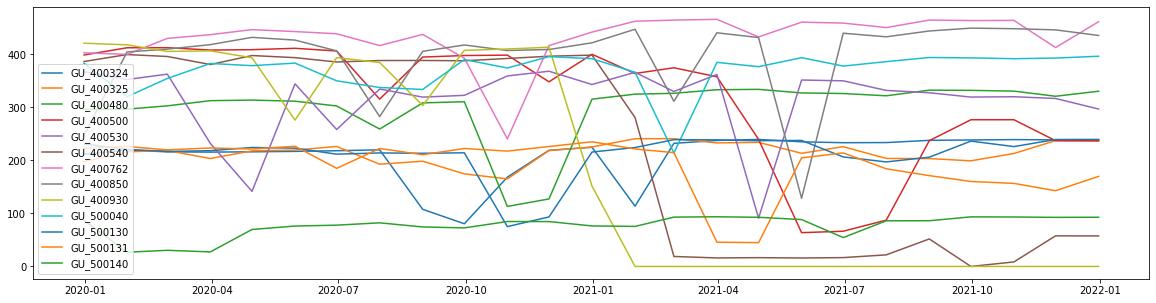

In [16]:
keygen_avail['date'] = pd.to_datetime(keygen_avail['date'])
coal_gem = fuel_info[fuel_info["fuel"] =="Coal"][['Generator']]
gas_gem = fuel_info[fuel_info["fuel"] =="Gas"][['Generator']]
keygen_avail_month= keygen_avail.resample('M',on='date').mean()

coal_data = keygen_avail_month[coal_gem["Generator"]]
gas_data = keygen_avail_month[gas_gem["Generator"]]

plt.figure(figsize=(20,5))
data_c = coal_data[-25:]
for i in range(0,len(coal_data.columns)):
    plt.plot(data_c.index,data_c.iloc[:,i], label=data_c.columns[i])
    plt.legend()
    
plt.figure(figsize=(20,5))
data_g = gas_data[-25:]
for i in range(0,len(gas_data.columns)):
    plt.plot(data_g.index,data_g.iloc[:,i], label=data_g.columns[i])
    plt.legend()

In [17]:
gene_drop = ["GU_400270","GU_400271","GU_400272","GU_500822","GU_500823","GU_400500","GU_400540","GU_400930"]
keygen_cost['Start Date'] = pd.to_datetime(keygen_cost['Start Date'])
dropping_keygen = keygen_cost[keygen_cost['Resource Code'].isin(gene_drop)].fillna(0)

dropping_keygen

2,Resource Code,Bid Type,Start Date,IncPrice1,IncQuantity1,IncPrice2,IncQuantity2,IncPrice3,IncQuantity3,IncPrice4,...,IncQuantity6,IncPrice7,IncQuantity7,IncPrice8,IncQuantity8,IncPrice9,IncQuantity9,IncPrice10,IncQuantity10,Daily_avg_cost
0,GU_400270,Complex,2018-01-10,51.990000,99.0,52.150000,140.00,53.405000,195.0,53.685000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.254772
1,GU_400270,Complex,2018-02-10,52.267917,99.0,52.427917,140.00,53.688750,195.0,53.968750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.538098
2,GU_400270,Complex,2018-03-10,52.903750,99.0,53.064167,140.00,54.343750,195.0,54.623750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.189401
3,GU_400270,Complex,2018-04-10,52.760000,99.0,52.930000,140.00,54.200000,195.0,54.480000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.045684
4,GU_400270,Complex,2018-05-10,52.765417,99.0,52.935000,140.00,54.205417,195.0,54.485417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.051085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18553,GU_500823,Complex,2021-07-23,104.410000,175.0,550.090000,257.92,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247.693908
18554,GU_500823,Complex,2021-07-24,104.408333,175.0,550.616250,257.92,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247.861964
18555,GU_500823,Complex,2021-07-25,104.370000,175.0,562.720000,257.92,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251.727250
18556,GU_500823,Complex,2021-07-26,104.379167,175.0,562.701250,257.92,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251.727442


In [18]:
data1 =commodity_price.resample('1M', on='date',label="left", closed="left").mean().reset_index(drop=True)
data2 =dam_monthly[dam_monthly["trade_month"] <= "2021-07-01"].reset_index(drop=True)
data3 = dam_monthly[dam_monthly["trade_month"] > "2021-07-01"].reset_index(drop=True)
final_data= pd.concat([data1, data2], axis=1, ignore_index=True)
final_data.columns=["Gas","Carbon","Coal","Oil","Distillate","Exchange Rate","date","DAM_price"]
# Preparing the data, we need the index to have datetime
final_data['date'] = pd.to_datetime(final_data.date , format = '%d/%m/%Y')
new_data = final_data.drop(['date'], axis=1)
new_data.index = final_data.date
new_data = new_data[["Gas","Coal","DAM_price"]]

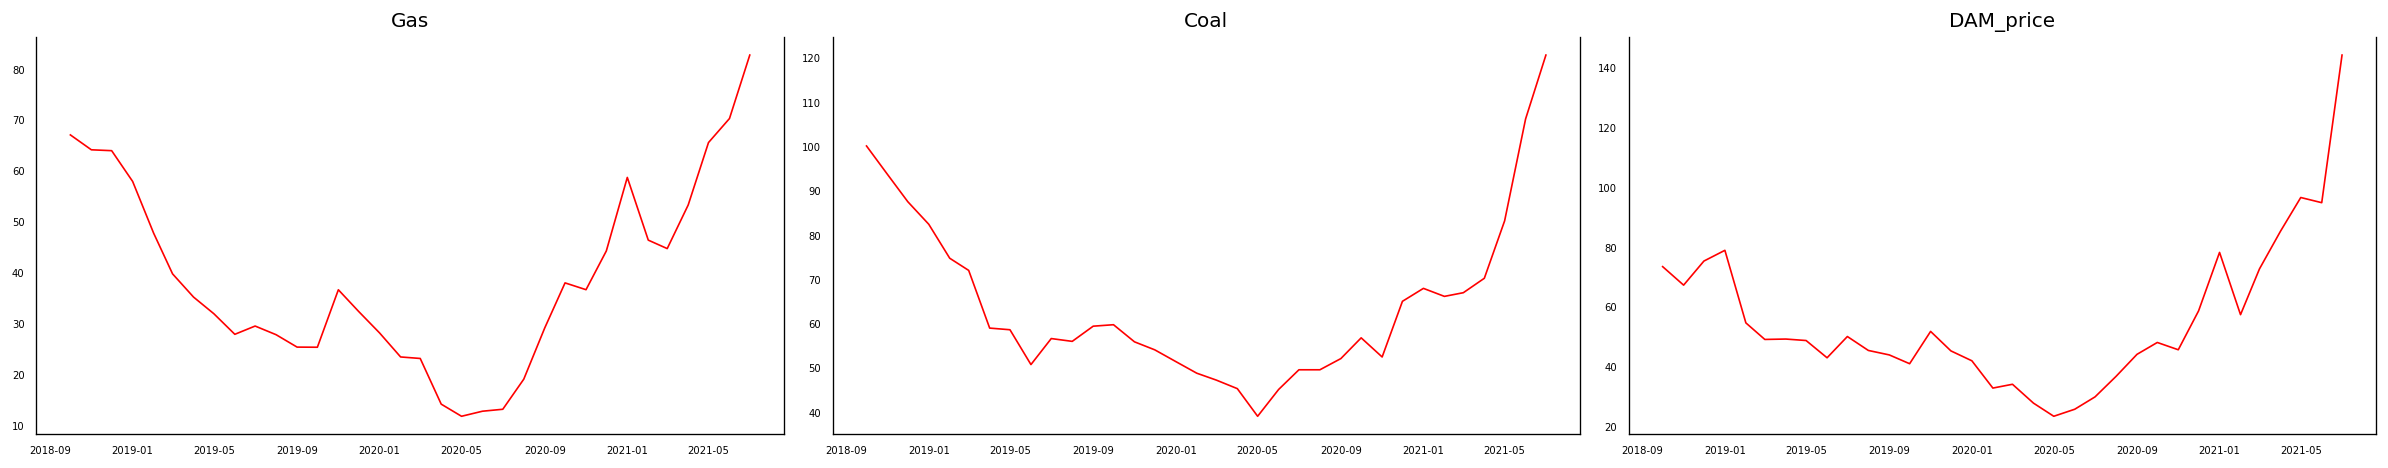

In [19]:
# Each of the series have a fairly similar trend patterns over the years 
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

fig, axes = plt.subplots(nrows=1, ncols=3, dpi=120, figsize=(20,4))
for i, ax in enumerate(axes.flatten()):
    data = new_data[new_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(new_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [20]:
# Testing Causation using Granger’s Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=3
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(new_data, variables = new_data.columns) 
#Looking at the P-Values in the above table, you can pretty much observe that all the variables (time series) in the system are interchangeably causing each other.


,Gas_x,Coal_x,DAM_price_x
Gas_y,1.0000,0.0110,0.0126
Coal_y,0.1057,1.0000,0.0002
DAM_price_y,0.0311,0.0001,1.0000


In [21]:
# Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(new_data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Gas    ::  44.34     > 24.2761   =>   True
Coal   ::  12.88     > 12.3212   =>   True
DAM_price ::  1.85      > 4.1296    =>   False


In [22]:
nobs = 4
df_train, df_test = new_data[0:-nobs], new_data[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 


(30, 3)
(4, 3)


In [23]:
# Check for Stationarity and Make the Time Series Stationary
# ADF Test. Augmented Dickey-Fuller Test (ADF Test)
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Gas" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5331
 No. Lags Chosen       = 4
 Critical value 1%     = -3.724
 Critical value 5%     = -2.986
 Critical value 10%    = -2.633
 => P-Value = 0.1076. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2661
 No. Lags Chosen       = 0
 Critical value 1%     = -3.679
 Critical value 5%     = -2.968
 Critical value 10%    = -2.623
 => P-Value = 0.0165. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DAM_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

In [24]:
# ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.
df_differenced = df_train.diff().diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    

    Augmented Dickey-Fuller Test on "Gas" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5248
 No. Lags Chosen       = 8
 Critical value 1%     = -3.833
 Critical value 5%     = -3.031
 Critical value 10%    = -2.656
 => P-Value = 0.0074. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9507
 No. Lags Chosen       = 8
 Critical value 1%     = -3.833
 Critical value 5%     = -3.031
 Critical value 10%    = -2.656
 => P-Value = 0.0398. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DAM_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

In [25]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  11.675712889123592
BIC :  12.251640385125516
FPE :  118456.72297638569
HQIC:  11.8469663258212 

Lag Order = 2
AIC :  11.470454329173027
BIC :  12.486609225267301
FPE :  99835.1356226983
HQIC:  11.763070172019074 

Lag Order = 3
AIC :  11.240816750625703
BIC :  12.703467740467543
FPE :  87790.65437742791
HQIC:  11.646493972754637 

Lag Order = 4
AIC :  11.109343028274282
BIC :  13.023680502589693
FPE :  98559.03106578837
HQIC:  11.617217299095561 

Lag Order = 5
AIC :  10.566092773222124
BIC :  12.935819832552523
FPE :  103273.30720256193
HQIC:  11.162072486452475 

Lag Order = 6
AIC :  6.0938108756264535
BIC :  8.920602686600272
FPE :  6354.2046852541225
HQIC:  6.759718026628245 



C:\Users\MYPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [26]:
# Let’s go with the lag 4 model.
x = model.select_order(maxlags=3)
x.summary()

,AIC,BIC,FPE,HQIC
0,12.07,12.22,1.752e+05,12.11
1,11.11,11.70*,6.765e+04,11.28*
2,11.01*,12.04,6.354e+04*,11.30
3,11.24,12.70,8.779e+04,11.65


In [27]:
# Train the VAR Model of Selected Order(p)
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Aug, 2021
Time:                     15:05:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    13.0237
Nobs:                     24.0000    HQIC:                   11.6172
Log likelihood:          -196.476    FPE:                    98559.0
AIC:                      11.1093    Det(Omega_mle):         26898.3
--------------------------------------------------------------------
Results for equation Gas
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.122477         1.511723            0.081           0.935
L1.Gas              -0.683998         0.652393           -1.048           0.294
L1.Coal              0.177842         0.348584            0.510   

In [28]:
# Forecast VAR model using statsmodels
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[  8.95607527,  16.89569892,  15.43145699],
       [  6.84071237,  -9.65268817,   6.56120027],
       [-26.78829205,  -4.72868664, -40.36975182],
       [ 10.66529378,   2.63801843,  36.11902763]])

In [29]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=new_data.index[-nobs:], columns=new_data.columns + '_2d')
df_forecast

,Gas_2d,Coal_2d,DAM_price_2d
date,,,
2021-04-01,21.235461,6.988168,6.723502
2021-05-01,-22.833692,-3.342785,-22.835533
2021-06-01,-18.905778,-11.270343,-14.711078
2021-07-01,45.936827,21.729882,56.091741


In [30]:
# Invert the transformation to get the real forecast
def invert_transformation(df_train, df_forecast, second_diff=True):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:    
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df_train, df_forecast, second_diff=True)
df_results.loc[:, ['Gas_forecast', 'Coal_forecast', 'DAM_price_forecast']]

,Gas_forecast,Coal_forecast,DAM_price_forecast
date,,,
2021-04-01,64.377382,74.902338,94.893592
2021-05-01,61.114621,79.378021,94.085809
2021-06-01,38.946081,72.583361,78.566948
2021-07-01,62.714368,87.518584,119.139828


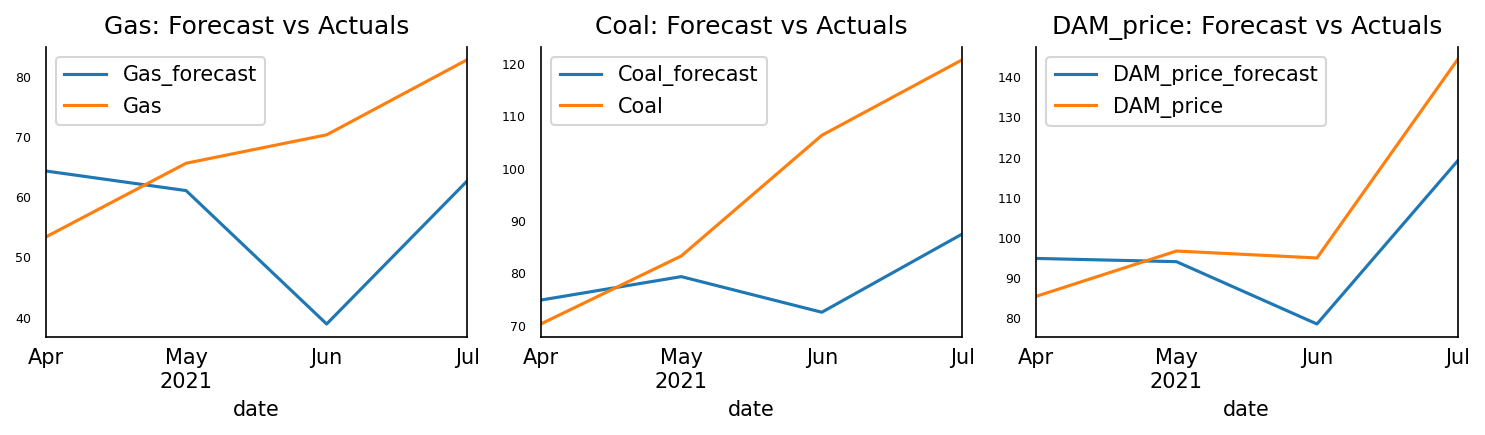

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=150, figsize=(10,3))
for i, (col,ax) in enumerate(zip(new_data.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [32]:
future_c = model_fitted.forecast(y=forecast_input,steps=8)
future_forecast = pd.DataFrame(future_c,index=data3.trade_month, columns=new_data.columns + '_2d')


df_future_results = invert_transformation(df_train, future_forecast, second_diff=True)
df_future_results.loc[:, ['Gas_forecast', 'Coal_forecast', 'DAM_price_forecast']]

df_future_results

,Gas_2d,Coal_2d,DAM_price_2d,Gas_1d,Gas_forecast,Coal_1d,Coal_forecast,DAM_price_1d,DAM_price_forecast
trade_month,,,,,,,,,
2021-08-01,21.235461,6.988168,6.723502,19.570931,64.377382,7.818467,74.902338,22.027751,94.893592
2021-09-01,-22.833692,-3.342785,-22.835533,-3.262761,61.114621,4.475683,79.378021,-0.807783,94.085809
2021-10-01,-18.905778,-11.270343,-14.711078,-22.168540,38.946081,-6.794660,72.583361,-15.518861,78.566948
2021-11-01,45.936827,21.729882,56.091741,23.768287,62.714368,14.935222,87.518584,40.572880,119.139828
2021-12-01,-7.100162,-8.696956,-27.989896,16.668125,79.382493,6.238266,93.756850,12.582984,131.722812
2022-01-01,-46.065830,-10.761832,-36.313041,-29.397705,49.984789,-4.523566,89.233283,-23.730057,107.992755
2022-02-01,32.754814,10.086178,46.572020,3.357109,53.341897,5.562612,94.795895,22.841964,130.834719
2022-03-01,43.216312,15.068524,26.176044,46.573421,99.915318,20.631136,115.427031,49.018008,179.852726


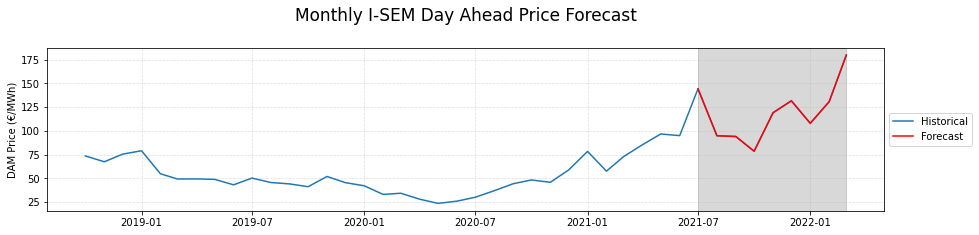

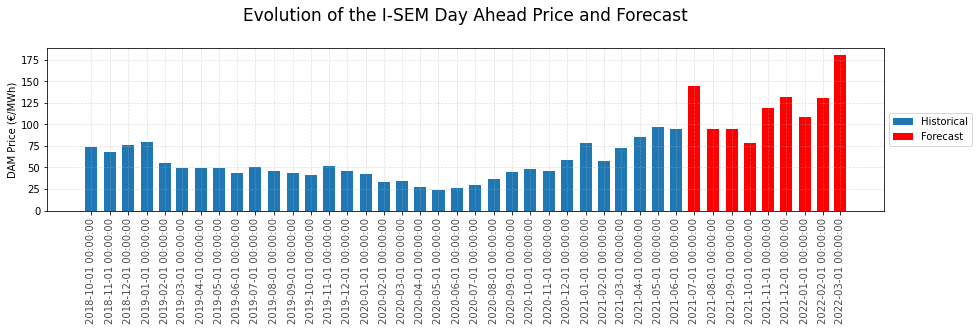

In [33]:
d2 =df_future_results.loc[:, ['Gas_forecast', 'Coal_forecast', 'DAM_price_forecast']]
d2.index.names = ['date']
d2.columns=["Gas","Coal","DAM_price"]
last_data= pd.concat([new_data, d2], axis=0, ignore_index=False)

plt.figure(figsize=(15,3))
plt.plot(last_data.index, last_data['DAM_price'],label="Historical")
plt.plot(last_data.index[-9:], last_data['DAM_price'][-9:],"r",label="Forecast")
plt.axvspan(last_data.index[-9], last_data.index[-1],color='gray', alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("DAM Price (€/MWh)")
plt.title ("Monthly I-SEM Day Ahead Price Forecast\n", fontsize=17)
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.7,alpha=0.4)
plt.grid(axis = 'x',linestyle = '--', linewidth = 0.7,alpha=0.4)

plt.figure(figsize=(15,3))
plt.bar(last_data.index, last_data['DAM_price'],label="Historical",width=20)
plt.bar(last_data.index[-9:], last_data['DAM_price'][-9:],width=20,color="red",label="Forecast")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("DAM Price (€/MWh)")
plt.title ("Evolution of the I-SEM Day Ahead Price and Forecast\n", fontsize=17)
xtick_location = pd.to_datetime(last_data.index).tolist()[::1]
xtick_labels =pd.to_datetime(last_data.index).tolist()[::1]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, alpha=.7)
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.7,alpha=0.4)
plt.grid(axis = 'x',linestyle = '--', linewidth = 0.7,alpha=0.4)

In [34]:
isem_2021_o=pd.read_excel("./part2.xlsx",sheet_name="2021",parse_dates=True)
isem_2020_o=pd.read_excel("./part2.xlsx",sheet_name="2020",parse_dates=True)
isem_2019_o=pd.read_excel("./part2.xlsx",sheet_name="2019",parse_dates=True)

In [35]:
isem_2021 = isem_2021_o
isem_2020 = isem_2020_o
isem_2019 = isem_2019_o

In [36]:
def create_isem_df(data):
    isem_data = data
    isem_data.columns = isem_data.iloc[1]
    isem_data = isem_data.iloc[2:]
    isem_data = isem_data.iloc[:,1:21].reset_index(drop=True)
    isem_prices = isem_data.iloc[:,[1,3,4,5,6,7,10]].reset_index(drop=True).fillna(0)
    isem_demand = isem_data.iloc[:,11:].reset_index(drop=True).fillna(0)
    isem_prices_col = ["trade_date","DAM","IDA1","IDA2","IDA3","BM","Cal_date"]
    isem_demand_col = ["Day_Wind","Cont_Wind","Output_Wind",
                       "Day_Demand","Cont_Demand","Output_Demand",
                       "Day_NetDemand","Cont_NetDemand","Output_NetDemand"]
    isem_prices.columns=isem_prices_col
    isem_demand.columns=isem_demand_col

    cols = list(isem_prices.columns)
    cols = [cols[-1]] + cols[:-1]
    isem_prices = isem_prices[cols]
    isem_prices

    isem_prices = isem_prices.infer_objects()
    isem_demand = isem_demand.infer_objects()
    isem_prices['trade_date'] = pd.to_datetime(isem_prices['trade_date'], format = '%d/%m/%Y')

    isem_complete= pd.concat([isem_prices, isem_demand], axis=1, ignore_index=False)
    return (isem_complete)

def check_for_na(data):
    na_info = data.isna().values.any()
    if na_info:
        print("NA found")
    else:
        print(f"No NA found")
        

In [37]:
isem_complete_2019 = create_isem_df(isem_2019)
isem_complete_2020 = create_isem_df(isem_2020)
isem_complete_2021 = create_isem_df(isem_2021)

In [38]:
# Verified there is no NA data in the complete data frame

check_for_na(isem_complete_2019)
check_for_na(isem_complete_2020)
check_for_na(isem_complete_2021)

No NA found
No NA found
No NA found


In [39]:
def plot_isemprices(data,title):
    plt.figure(figsize=(10,2))
    plt.plot(data.Cal_date,data.DAM,label="DAM")
    plt.plot(data.Cal_date,data.IDA1,label="IDA1")
    plt.plot(data.Cal_date,data.IDA2,label="IDA2")
    plt.plot(data.Cal_date,data.IDA3,label="IDA3")
    plt.plot(data.Cal_date,data.BM,"--",color="grey",label="BM")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title,fontsize=17)
    plt.grid()
        
def plot_windforecast(data):
    plt.figure(figsize=(10,2))
    plt.plot(data.Cal_date,data.Day_Wind,label="Day_Wind",color="silver")
    plt.plot(data.Cal_date,data.Cont_Wind,"--",label="Cont_Wind",color="black")
    plt.plot(data.Cal_date,data.Output_Wind,label="Output_Wind", color="black")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()
    
def plot_netdemandforecast(data):
    plt.figure(figsize=(10,2))
    plt.plot(data.Cal_date,data.Day_NetDemand,label="Day_NetDemand",color="darkred")
    plt.plot(data.Cal_date,data.Cont_NetDemand,"--",label="Cont_NetDemand",color="darkred")
    plt.plot(data.Cal_date,data.Output_NetDemand,label="Output_NetDemand", color="salmon")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()
    
def plot_data_compare(data,title):
    plot_isemprices(data,title)
    plot_windforecast(data)
    plot_netdemandforecast(data)

In [40]:
### Trade 1 - Market 1
def trade_mark1(row):
    if ((row["IDA2"] == 0) &
        (row["IDA3"] == 0) &
        (row['Output_Wind'] <= 1000) &
        (row['Day_NetDemand'] > 1200)):
        return (row["BM"] - row["DAM"])
    else:
        return (0)

### Trade 1 - Market 2
def trade_mark2(row):
    if ((row["IDA2"] > 0) &
        (row["IDA3"] == 0) &
        (row['Output_Wind'] <= 1000) &
        (row['Day_NetDemand'] > 1200)):
        return (row["BM"] - row["IDA1"])
    else:
        return (row["PL"])
    
### Trade 1 - Market 3
def trade_mark3(row):
    if ((row["IDA2"] > 0) &
        (row["IDA3"] > 0) &
        (row['Output_Wind'] <= 1000) &
        (row['Day_NetDemand'] > 1200)):
        return (row["DAM"] - row["IDA3"])
    else:
        return (row["PL"])

def prepare_market(data):
    market_1 = data[(data["IDA2"] == 0) &
                         (data["IDA3"] == 0)]
    market_2 = data[(data["IDA2"] > 0) &
                             (data["IDA3"] == 0)]
    market_3 = data[(data["IDA2"] > 0) &
                             (data["IDA3"] > 0)]
    print(f"Dimensions of market 1 {market_1.shape}")
    print(f"Dimensions of market 2 {market_2.shape}")
    print(f"Dimensions of market 3 {market_3.shape}")
    Trade = data
    Trade['PL'] = Trade.apply(lambda row : trade_mark1(row), axis = 1)
    print(Trade[Trade['PL'] >0].shape)
    print(max(Trade['PL']))
    print(Trade[Trade['PL'] <0].shape)
    print(min(Trade['PL']))
    print(Trade['PL'].sum())
    Trade['PL'] = Trade.apply(lambda row : trade_mark2(row), axis = 1)
    print(Trade[Trade['PL'] >0].shape)
    print(max(Trade['PL']))
    print(Trade[Trade['PL'] <0].shape)
    print(min(Trade['PL']))
    print(Trade['PL'].sum())
    Trade['PL'] = Trade.apply(lambda row : trade_mark3(row), axis = 1)
    print(Trade[Trade['PL'] >0].shape)
    print(max(Trade['PL']))
    print(Trade[Trade['PL'] <0].shape)
    print(min(Trade['PL']))
    print(Trade['PL'].sum())
    return (Trade,market_1,market_2,market_3)

In [41]:
Trade_2019,M1_2019,M2_2019,M3_2019 = prepare_market(isem_complete_2019)
Trade_2020,M1_2020,M2_2020,M3_2020 = prepare_market(isem_complete_2020)
Trade_2021,M1_2021,M2_2021,M3_2021 = prepare_market(isem_complete_2021)

pl_data_2019 = pd.DataFrame([np.arange(0,Trade_2019['PL'].shape[0]), Trade_2019['PL'], np.cumsum(Trade_2019['PL'])]).T
pl_data_2019.columns=["Iter","PL","PL_cum"]

pl_data_2020 = pd.DataFrame([np.arange(0,Trade_2020['PL'].shape[0]), Trade_2020['PL'], np.cumsum(Trade_2020['PL'])]).T
pl_data_2020.columns=["Iter","PL","PL_cum"]

pl_data_2021 = pd.DataFrame([np.arange(0,Trade_2021['PL'].shape[0]), Trade_2021['PL'], np.cumsum(Trade_2021['PL'])]).T
pl_data_2021.columns=["Iter","PL","PL_cum"]

Dimensions of market 1 (8760, 16)
Dimensions of market 2 (4382, 16)
Dimensions of market 3 (4361, 16)
(1329, 17)
368.853
(2614, 17)
-311.04999999999995
-1479.3130000000037
(1989, 17)
368.853
(3827, 17)
-311.04999999999995
-457.33300000000213
(2864, 17)
368.853
(4777, 17)
-311.04999999999995
-7096.0850000000055
Dimensions of market 1 (8793, 16)
Dimensions of market 2 (4325, 16)
Dimensions of market 3 (4314, 16)
(1442, 17)
349.31
(2011, 17)
-224.60999999999999
10895.976999999999
(2136, 17)
421.8399999999999
(2821, 17)
-224.60999999999999
25136.240999999998
(2915, 17)
421.8399999999999
(3651, 17)
-224.60999999999999
19427.726000000002
Dimensions of market 1 (4958, 16)
Dimensions of market 2 (2454, 16)
Dimensions of market 3 (2457, 16)
(1083, 17)
348.7399999999999
(1500, 17)
-336.72999999999996
4459.830000000004
(1732, 17)
1091.05
(2061, 17)
-336.72999999999996
26007.920000000006
(2499, 17)
1091.05
(2460, 17)
-336.72999999999996
36215.781


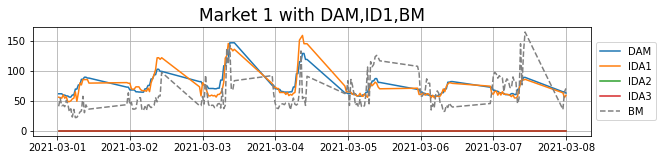

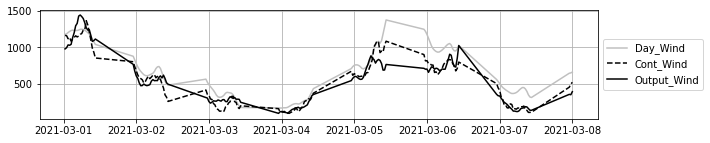

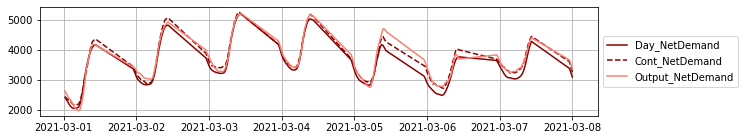

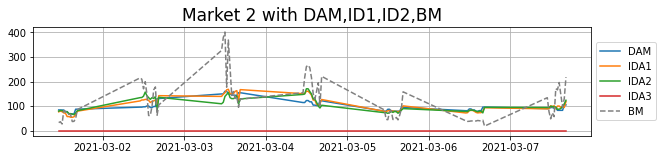

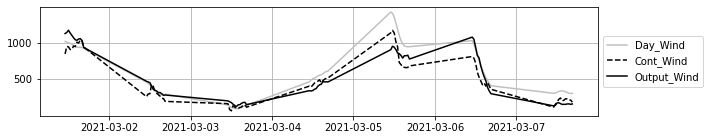

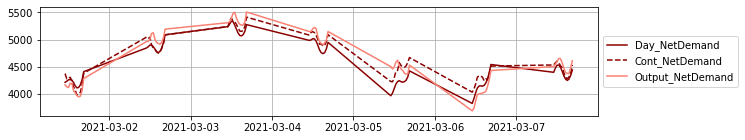

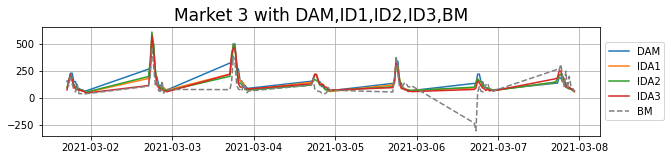

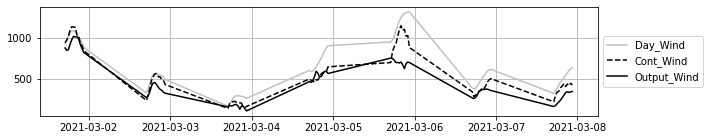

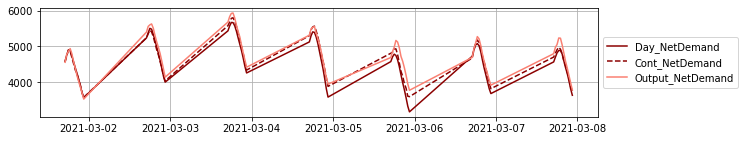

In [42]:
M1_2021_inspect = M1_2021[(M1_2021['Cal_date'] >="2021-03-01 00:23:00.000") &
                (M1_2021['Cal_date'] <"2021-03-08 00:23:00.000")]

M2_2021_inspect = M2_2021[(M2_2021['Cal_date'] >="2021-03-01 00:23:00.000") &
                (M2_2021['Cal_date'] <"2021-03-08 00:23:00.000")]

M3_2021_inspect = M3_2021[(M3_2021['Cal_date'] >="2021-03-01 00:23:00.000") &
                (M3_2021['Cal_date'] <"2021-03-08 00:23:00.000")]

plot_data_compare(M1_2021_inspect,"Market 1 with DAM,ID1,BM")
plot_data_compare(M2_2021_inspect,"Market 2 with DAM,ID1,ID2,BM")
plot_data_compare(M3_2021_inspect,"Market 3 with DAM,ID1,ID2,ID3,BM")

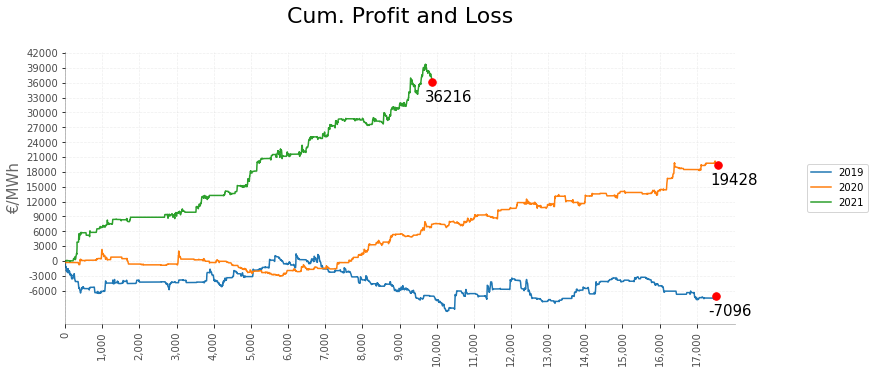

In [43]:
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(12,5))
plt.plot(pl_data_2019.Iter, pl_data_2019.PL_cum,label="2019")
plt.plot(pl_data_2020.Iter, pl_data_2020.PL_cum,label="2020")
plt.plot(pl_data_2021.Iter, pl_data_2021.PL_cum,label="2021")
plt.plot(pl_data_2019['Iter'].iloc[-1], pl_data_2019['PL_cum'].iloc[-1],"r.",markersize=15)
plt.plot(pl_data_2020['Iter'].iloc[-1], pl_data_2020['PL_cum'].iloc[-1],"r.",markersize=15)
plt.plot(pl_data_2021['Iter'].iloc[-1], pl_data_2021['PL_cum'].iloc[-1],"r.",markersize=15)
plt.text(pl_data_2019['Iter'].iloc[-1]-200, pl_data_2019['PL_cum'].iloc[-1]-4000,
         f"{round(pl_data_2019['PL_cum'].iloc[-1])}",fontsize=15)
plt.text(pl_data_2020['Iter'].iloc[-1]-200, pl_data_2020['PL_cum'].iloc[-1]-4000,
         f"{round(pl_data_2020['PL_cum'].iloc[-1])}",fontsize=15)
plt.text(pl_data_2021['Iter'].iloc[-1]-200, pl_data_2021['PL_cum'].iloc[-1]-4000,
         f"{round(pl_data_2021['PL_cum'].iloc[-1])}",fontsize=15)
plt.xlim(0,pl_data_2019.shape[0]+500)
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)
plt.ylabel('€/MWh',fontsize=15,alpha=.6)
xtick_location = pl_data_2019.Iter.tolist()[::1000]
xtick_labels = pl_data_2019.Iter.tolist()[::1000]
ytick_location = np.arange(-6000,45000,3000)
ytick_labels = np.arange(-6000,45000,3000)
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, alpha=.7)
plt.yticks(ticks=ytick_location, labels=ytick_labels,alpha=.7)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Cum. Profit and Loss\n", fontsize=22)
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.7,alpha=0.2)
plt.grid(axis = 'x',linestyle = '--', linewidth = 0.7,alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))


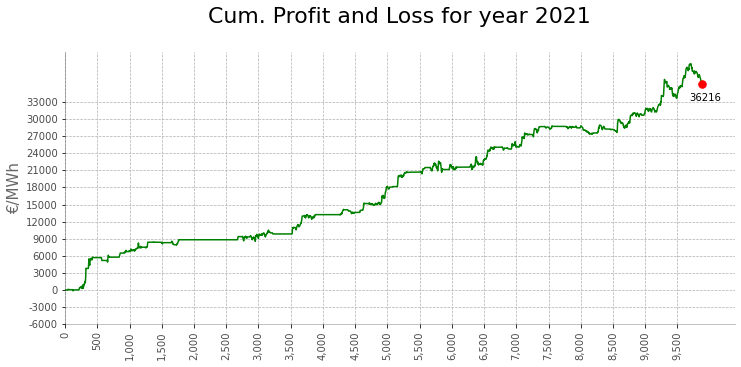

In [44]:
plt.figure(figsize=(12,5))
plt.plot(pl_data_2021.Iter, pl_data_2021.PL_cum,label="2021",color="green")
plt.plot(pl_data_2021['Iter'].iloc[-1], pl_data_2021['PL_cum'].iloc[-1],"r.",markersize=15)
plt.text(pl_data_2021['Iter'].iloc[-1]-200, pl_data_2021['PL_cum'].iloc[-1]-3000,f"{round(pl_data_2021['PL_cum'].iloc[-1])}")
plt.xlim(0,pl_data_2021.shape[0]+500)
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)
plt.ylabel('€/MWh',fontsize=15,alpha=.6)
xtick_location = pl_data_2021.Iter.tolist()[::500]
xtick_labels = pl_data_2021.Iter.tolist()[::500]
ytick_location = np.arange(-6000,35000,3000)
ytick_labels = np.arange(-6000,35000,3000)
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, alpha=.7)
plt.yticks(ticks=ytick_location, labels=ytick_labels,alpha=.7)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Cum. Profit and Loss for year 2021\n", fontsize=22)
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.7)
plt.grid(axis = 'x',linestyle = '--', linewidth = 0.7)


In [45]:
def show_pl_calc(data,year):
    print("\n***********************************")
    print(f"Profit Loss data for year {year}")
    print("***********************************")
    total_trades = sum(data.PL != 0)
    total_avail_trades =  data.shape[0]
    per_trades = round((total_trades/total_avail_trades)*100,2)
    win_trade = sum(data.PL > 0)
    loss_trade = sum(data.PL < 0)
    win_ratio = round((win_trade/(win_trade+loss_trade)*100),2)
    loss_ratio = round((loss_trade/(win_trade+loss_trade)*100),2)
    av_win_trade = round(np.mean(data[data["PL"] > 0]["PL"]),2)
    av_loss_trade = round(np.mean(data[data["PL"] < 0]["PL"]),2)
    max_win_trade = np.max(data[data["PL"] > 0]["PL"])
    max_loss_trade = round(np.min(data[data["PL"] < 0]["PL"]),2)
    print(f"Total trades: {total_trades}")
    print(f"Total Available trades: {total_avail_trades}")
    print(f"Percentage of trades: {per_trades}%")
    print("------------------------------------")
    print(f"Winning trades: {win_trade}")
    print(f"Loss trades: {loss_trade}")
    print("------------------------------------")
    print(f"Winning Ratio: {win_ratio}%")
    print(f"Loss Ratio: {loss_ratio}%")
    print("------------------------------------")
    print(f"Average Win trades: {av_win_trade}")
    print(f"Average Loss trades: {av_loss_trade}")
    print("------------------------------------")
    print(f"Max Win trades: {max_win_trade}")
    print(f"Max Loss trades: {max_loss_trade}")

In [46]:
show_pl_calc(pl_data_2019,"2019")
show_pl_calc(pl_data_2020,"2020")
show_pl_calc(pl_data_2021,"2021")


***********************************
Profit Loss data for year 2019
***********************************
Total trades: 7641
Total Available trades: 17520
Percentage of trades: 43.61%
------------------------------------
Winning trades: 2864
Loss trades: 4777
------------------------------------
Winning Ratio: 37.48%
Loss Ratio: 62.52%
------------------------------------
Average Win trades: 33.69
Average Loss trades: -21.69
------------------------------------
Max Win trades: 368.853
Max Loss trades: -311.05

***********************************
Profit Loss data for year 2020
***********************************
Total trades: 6566
Total Available trades: 17568
Percentage of trades: 37.37%
------------------------------------
Winning trades: 2915
Loss trades: 3651
------------------------------------
Winning Ratio: 44.4%
Loss Ratio: 55.6%
------------------------------------
Average Win trades: 27.97
Average Loss trades: -17.01
------------------------------------
Max Win trades: 421.83999